In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

 98% 703M/715M [00:08<00:00, 179MB/s]
100% 715M/715M [00:08<00:00, 92.5MB/s]


In [ ]:
!ls

cifar-10-python.tar.gz	cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset ='/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10-python.tar.gz	kaggle.json  sampleSubmission.csv  train.7z
cifar-10.zip		sample_data  test.7z		   trainLabels.csv


In [ ]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.6 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()            #archive.extractall(path=' /content/TRAINING DATA')                   
archive.close()

In [ ]:
!ls

 cifar-10-python.tar.gz   sampleSubmission.csv	'TRAINING DATA'
 cifar-10.zip		  test.7z		 trainLabels.csv
 kaggle.json		  train
 sample_data		  train.7z


NOW ,WE NEED TO IMPORT DEPENDENCIES


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

Printing the first 5 images in the train.csv file as well as last 5 images is below in the code.

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['33921.png', '18056.png', '31916.png', '21240.png', '7451.png']
['40229.png', '40356.png', '34525.png', '6544.png', '42106.png']


Next, we process the labels so we use panda dataframes.

In [ ]:
 labels_df = pd.read_csv('/content/trainLabels.csv')                          

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


If we want to import an image. It is not recommended because its 32x32 images and it will be to small to view but for sample example we can import one image as follows:


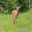

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/33921.png')
cv2_imshow(img)

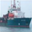

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/18056.png')
cv2_imshow(img)

Since, images are small we can read the images with the following code.


In [ ]:
labels_df[labels_df['id'] == 18056]

,id,label
18055,18056,ship


In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Next step would be image processing where in we need to convert images to an numpy array


In [ ]:

train_data_folder = '/content/train/'
data = []
for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)



list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
data[0] 

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Since, sizes of images will not always be the same so hence we need to convert it the same size which is given as 32x32 
converting image list and label to numpy arrays.


In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


We need to train and test the dataset.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


Normalization is done which is a method of scaling.
Normalization is a data pre-processing tool used to bring the numerical data to a common scale without distorting its shape.


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

We are finished with processing the data and are moving onto to building a neural network, above were the use cases for the implmentation.

In [ ]:
import tensorflow as tf
from tensorflow import keras

We have to set up layers,  we can take convolution layer as resnet50 is dependent on it.


In [ ]:
num_of_classes = 10
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

Adam Optimizer:
Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [ ]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 13s 4ms/step - loss: 1.9717 - acc: 0.2788 - val_loss: 1.9153 - val_acc: 0.3072
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8285 - acc: 0.3392 - val_loss: 1.7758 - val_acc: 0.3575
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7886 - acc: 0.3551 - val_loss: 1.7460 - val_acc: 0.3625
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7640 - acc: 0.3677 - val_loss: 1.7446 - val_acc: 0.3787
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7470 - acc: 0.3725 - val_loss: 1.7222 - val_acc: 0.3862
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7287 - acc: 0.3849 - val_loss: 1.7389 - val_acc: 0.3702
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7213 - acc: 0.3841 - val_loss: 1.7209 - val_acc: 0.3803
Epoch 8/10
1125/1125 [==============================] - 3s 3m

For better functionalities we use ResNet50 - transferring technique
we train a pre-trained model which is ResNet50 over our already existing custom model to get better performance.
Our custom model is CIFAR-10.


In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

 The output layer of the ResNet50 database is dropped, so that we can update it with our customized output layer.

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
num_of_classes = 10
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 470s 382ms/step - loss: 1.6400 - acc: 0.4531 - val_loss: 0.8765 - val_acc: 0.7747
Epoch 2/10
1125/1125 [==============================] - 427s 380ms/step - loss: 0.9776 - acc: 0.7106 - val_loss: 0.4794 - val_acc: 0.8857
Epoch 3/10
1125/1125 [==============================] - 428s 380ms/step - loss: 0.7200 - acc: 0.8134 - val_loss: 0.3339 - val_acc: 0.9250
Epoch 4/10
1125/1125 [==============================] - 434s 386ms/step - loss: 0.5616 - acc: 0.8699 - val_loss: 0.2916 - val_acc: 0.9310
Epoch 5/10
1125/1125 [==============================] - 427s 380ms/step - loss: 0.4395 - acc: 0.9077 - val_loss: 0.2673 - val_acc: 0.9335
Epoch 6/10
1125/1125 [==============================] - 434s 386ms/step - loss: 0.3471 - acc: 0.9346 - val_loss: 0.2382 - val_acc: 0.9413
Epoch 7/10
1125/1125 [==============================] - 427s 380ms/step - loss: 0.2796 - acc: 0.9538 - val_loss: 0.2256 - val_acc: 0.9415
Epoch 8/10
1125/1125 [============

In [ ]:

loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 37s 114ms/step - loss: 0.2431 - acc: 0.9365
Test Accuracy = 0.9365000128746033


Below lies the plotted graph for loss and accuracy change which is supposed to be the main step towards the end of this architecture.


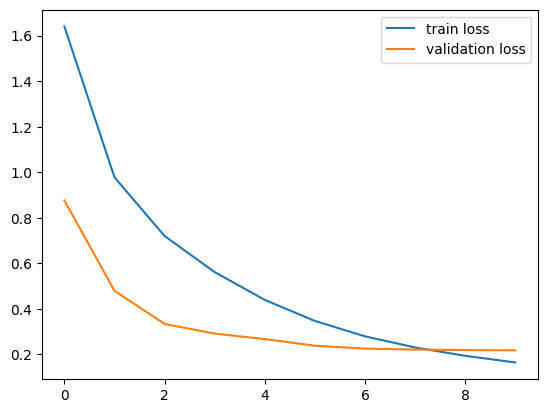

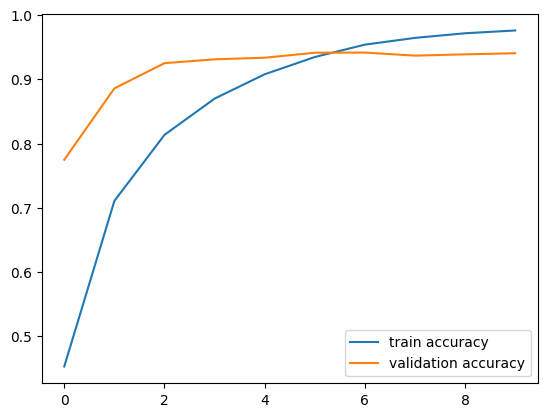

In [ ]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()